# <span style='color:green'> Temperature Analysis II  </span> 

### You are looking to take a trip from August first to August seventh of this year, but are worried that the weather will be less than ideal. Using historical data in the dataset find out what the temperature has previously looked like.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
 import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../sqlalchemy-challenge/Resources/hawaii.sqlite")

In [5]:
# Save references to each table
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# <span style='color:orange'> Average Temperature  </span> 

## Great Temperature! The average temperature for the same week last year  was 79 F (26°C), with a min of 72 F (22 °C) and a max of 83 (28 °C)

In [70]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()


In [9]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
stats=calc_temps('2017-08-01', '2017-08-07')
stats

[(72.0, 79.25, 83.0)]

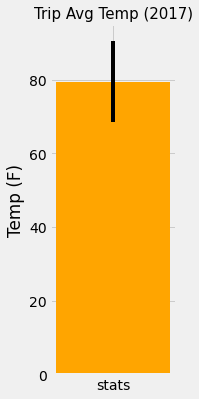

In [10]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin=[72]
tavg=[79.5]
tmax =[83]
yerr=11    ##tmax-tmin
x=["stats"]

fig = plt.figure(figsize = (2, 6))

plt.bar(x, tavg, yerr=yerr , color ='orange')

plt.ylim=(0,100)
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp (2017)", fontsize=15)
plt.show()



# <span style='color:Blue'> Daily Rainfall  </span>

## Not rainy week! The total amount rainfall registered during the same week last year was of 0.6 inches (1.5 cm). 

In [71]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
info = [measurement.station, station.name, func.sum(measurement.prcp),station.latitude, station.longitude, station.elevation ]
results= session.query(*info).\
    filter(measurement.station == station.station).\
    filter(measurement.date >= '2017-08-01',measurement.date <="2017-08-07" ).\
    group_by(station.name).\
    order_by(func.sum(measurement.prcp).desc()).all() 
             
for result in results: 
    print(result)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.36, 21.3331, -157.8025, 152.4)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.22, 21.5213, -157.8374, 7.0)
('USC00519281', 'WAIHEE 837.5, HI US', 0.06, 21.45167, -157.84888999999998, 32.9)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.04, 21.2716, -157.8168, 3.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.0, 21.33556, -157.71139, 19.5)


# <span style='color:orange'> Daily Temperature Normals  </span>

In [72]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
range_dates= session.query(measurement.date).\
    filter(func.strftime("%m-%d", measurement.date)>= start_date).\
    filter(func.strftime("%m-%d",measurement.date) <end_date).\
    order_by(measurement.date).all()

range_dates

# # Strip off the year and save a list of strings in the format %m-%d

normals=[]
for date in range_dates:
    def daily_normals(range_dates):
#     """Daily Normals.
    
#     Args:
#         date (str): A date string in the format '%m-%d'
        
#     Returns:
#         A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#     """
    
        sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
        return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == range_dates).all()
        normals.append(return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == range_dates).all()
# # For example
# # daily_normals("08-30")
# print(normals)

SyntaxError: invalid syntax (<ipython-input-72-97c5c1de1070>, line 33)

In [ ]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.